In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt
import cv2
import os
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from PIL import Image

In [2]:
mat = scio.loadmat('simul_out/90-80_day_205.mat')

In [4]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'atmprofile', 'pint', 'pmid', 'temperature_int', 'temperature_int_save', 'temperature_mid', 'temperature_mid_save'])

In [5]:
Tend = mat.get('temperature_int')[0]
T = mat.get('temperature_int_save')
p = mat.get('pint')[0]
Tend = np.flip(Tend)

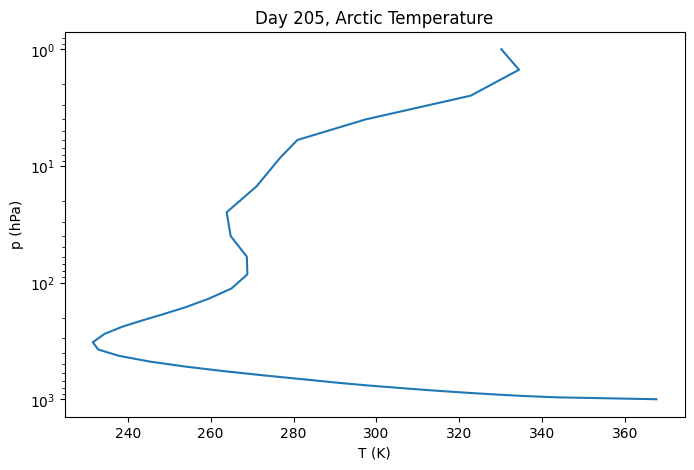

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(Tend, p)
ax.set_xlabel('T (K)')
ax.set_ylabel('p (hPa)')
ax.set_yscale('log')
ax.invert_yaxis()
ax.set_title('Day 205, Arctic Temperature')
plt.savefig('Plots/90_dyn.png', bbox_inches='tight')

In [11]:
frame_size = (800,600)
frame_rate = 30
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for video format
vid = cv2.VideoWriter('Plots/90_dyn.mp4', fourcc, frame_rate, frame_size)
for i in range(len(T)):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(np.flip(T[i]), p)
    ax.set_xlabel('T (K)')
    ax.set_ylabel('p (hPa)')
    ax.set_yscale('log')
    ax.set_ylim(max(p)+200, min(p)-0.1)
    ax.set_title('Arctic Temperature, day '+str((i+1)/2))
    canvas = FigureCanvas(fig)
    canvas.draw()
    img = np.array(canvas.renderer.buffer_rgba())
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)
    img_bgr_resized = cv2.resize(img_bgr, frame_size)
    # Write the frame to the video
    vid.write(img_bgr_resized)
    # Close the plot to avoid display
    plt.close(fig)
    
vid.release()
cv2.destroyAllWindows()